# Plot oil mass (hopefully) balance for:
- Surface
- Dispersed
- Evaporated
- Biodegraded
- Dissolved
- Beached

In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from midoss_utils import *

In [2]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results')
diesel_sro = results_path/'SoG_10000_diesel'/'resOilOutput.sro'
bunker_sro = results_path/'SoG_10000_bunkerc'/'resOilOutput.sro'

## Calculate mass of beached oil using:
- volume
- density

'VolumeBeached' is the water-oil emulsion, so I use 'VolOilBeached'

**Unknown**: Is Density the density of the water-oil emulsion?  Should I just use density of pure oil? 

In [3]:
beached = load_sro(diesel_sro,['VolOilBeached','Density'])
beached['mass']    = [row['VolOilBeached']*row['Density'] for day, row in beached.iterrows()]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


Text(0, 0.5, 'Mass Beached [kg]')

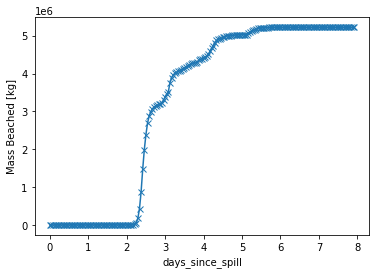

In [4]:
ax = beached['mass'].plot(
    linewidth=1.5,
    marker='x'
)
ax.set_ylabel('Mass Beached [kg]')

**10,000 m^3 was spilled**

## Calculate mass of floating oil 
- Thickness
- Area
- Density

Or...just use 'Mass'?  

In [5]:
floating = load_sro(diesel_sro,['Area','Density', 'Thickness', 'MassOil'])
floating['mass']    = [row['Area']*row['Density']*row['Thickness']*1e-6 for day, row in floating.iterrows()]

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


In [6]:
# calculate the original mass in kg
spill_volume = 10000
original_mass = floating.Density[0]*spill_volume
original_mass

8331850.1642

Text(0, 0.5, 'Mass Floating [kg]')

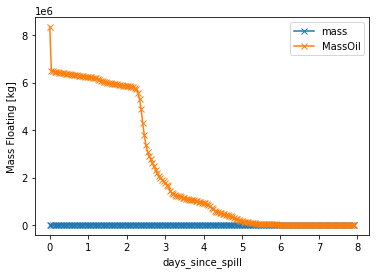

In [7]:
ax = floating[['mass', 'MassOil']].plot(
    linewidth=1.5,
    marker='x'
)
ax.set_ylabel('Mass Floating [kg]')

Text(0, 0.5, 'Mass Floating [kg]')

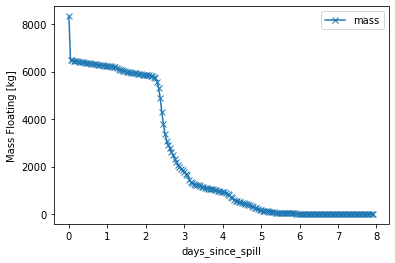

In [8]:
ax = floating[['mass']].plot(
    linewidth=1.5,
    marker='x'
)
ax.set_ylabel('Mass Floating [kg]')

**Use MassOil to show surface mass**

Text(0, 0.5, 'Spill Area [m^2?]')

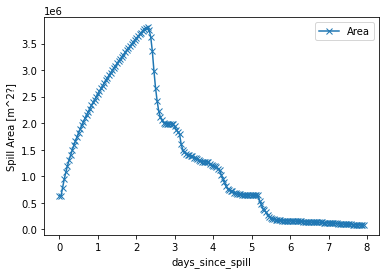

In [9]:
ax = floating[['Area']].plot(
    linewidth=1.5,
    marker='x'
)
ax.set_ylabel('Spill Area [m^2?]')

# plot all Diesel mass values 

### load values from .sro file

In [10]:
# load all the values that we need
mass = load_sro(diesel_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


### calculate original mass of spilled oil, mass of beached oil, and net mass of weathered oil

In [11]:
# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

### cleanup dataframe by removing unneccessary columns 
again, this step will get folded into the load_sro script

In [12]:
mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

,MEvaporated,MDispersed,MDissolved,MBio,MFloating,datetime,MInitial,MBeached,MTotal
days_since_spill,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,8.331850e+06,2018-01-15 00:30:00,8.331850e+06,0.0,8.331850e+06


### plot all mass values

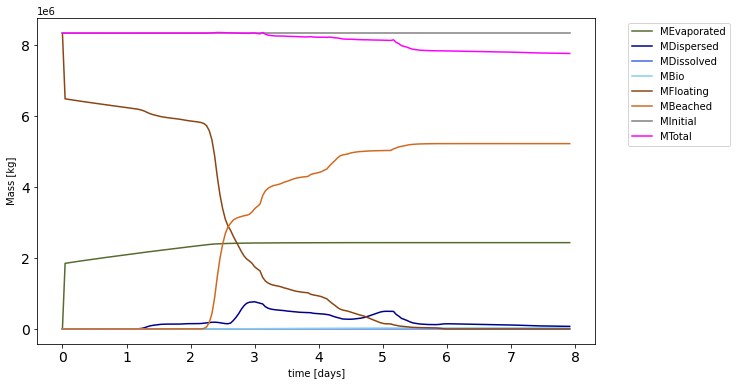

In [13]:
color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))

In [14]:
import pylab as plot
params = {'legend.fontsize': 14,
          'axes.labelsize' : 20,
          'legend.handlelength': 2,
          'xtick.labelsize' : 16,
          'ytick.labelsize' : 16}

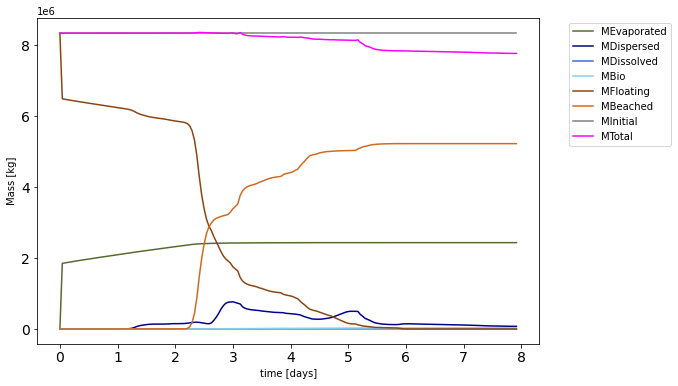

In [15]:
ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (9,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))

## Plot bunker-c case

In [16]:
# load all the values that we need
bunkerc_mass = load_sro(bunker_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
bunkerc_mass = bunkerc_mass.rename(columns={"MassOil":"MFloating"})
# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = bunkerc_mass.Density[0] #kg/m3
bunkerc_mass['MInitial'] = [spill_volume * initial_density for i in range(len(bunkerc_mass.Density))]
# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
bunkerc_mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in bunkerc_mass.iterrows()]
# net mass of weathered oil
bunkerc_mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in bunkerc_mass.iterrows()]
bunkerc_mass = bunkerc_mass.drop(['VolOilBeached','Density'], axis=1)

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


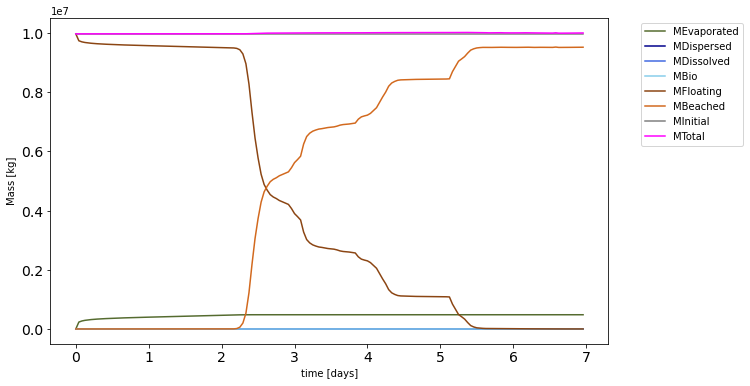

In [17]:
ax = bunkerc_mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))